<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Python Data Visualization for Everyone</h1>
<h1>matplotlib animations</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from IPython import display

import watermark

from tqdm.notebook import tqdm

%load_ext watermark
%matplotlib notebook

# Turn off matplotlib plot in Notebook
plt.ioff();

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.12.3

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Git hash: ffa5e3f9daff346f64374a00a6995a2c6b3d218f

cartopy   : 0.22.0
watermark : 2.4.3
pandas    : 2.2.3
numpy     : 1.26.4
IPython   : 8.12.3
matplotlib: 3.8.4



Let us start with the simplest example of an animation

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    
    return line,

anim = FuncAnimation(fig, 
                     animate, 
                     init_func=init,
                     frames=200, 
                     interval=20, 
                     blit=True,
                     repeat=True)

# Display the animation as an HTML video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

Read the volcano data file

In [4]:
data = pd.read_csv('data/volcano.csv')

Our dataset is just a grid of points corresponding to heights on the X-Y plane

In [5]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,100,100,101,101,101,101,101,100,100,100,...,107,107,107,106,106,105,105,104,104,103
1,101,101,102,102,102,102,102,101,101,101,...,108,108,107,107,106,106,105,105,104,104
2,102,102,103,103,103,103,103,102,102,102,...,109,108,108,107,107,106,106,105,105,104
3,103,103,104,104,104,104,104,103,103,103,...,109,109,108,108,107,107,106,106,105,105
4,104,104,105,105,105,105,105,104,104,103,...,110,109,109,108,107,107,107,106,106,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,99,99,99,99,100,100,101,101,102,102,...,95,95,95,95,94,94,94,94,94,94
83,98,99,99,99,99,100,100,101,101,102,...,95,95,94,94,94,94,94,94,94,94
84,98,98,98,99,99,99,100,100,101,101,...,94,94,94,94,94,94,94,94,94,94
85,97,98,98,98,99,99,99,100,100,100,...,94,94,94,94,94,94,94,94,94,94


Which we can easily visualize using vanilla matplotlib

<IPython.core.display.Javascript object>


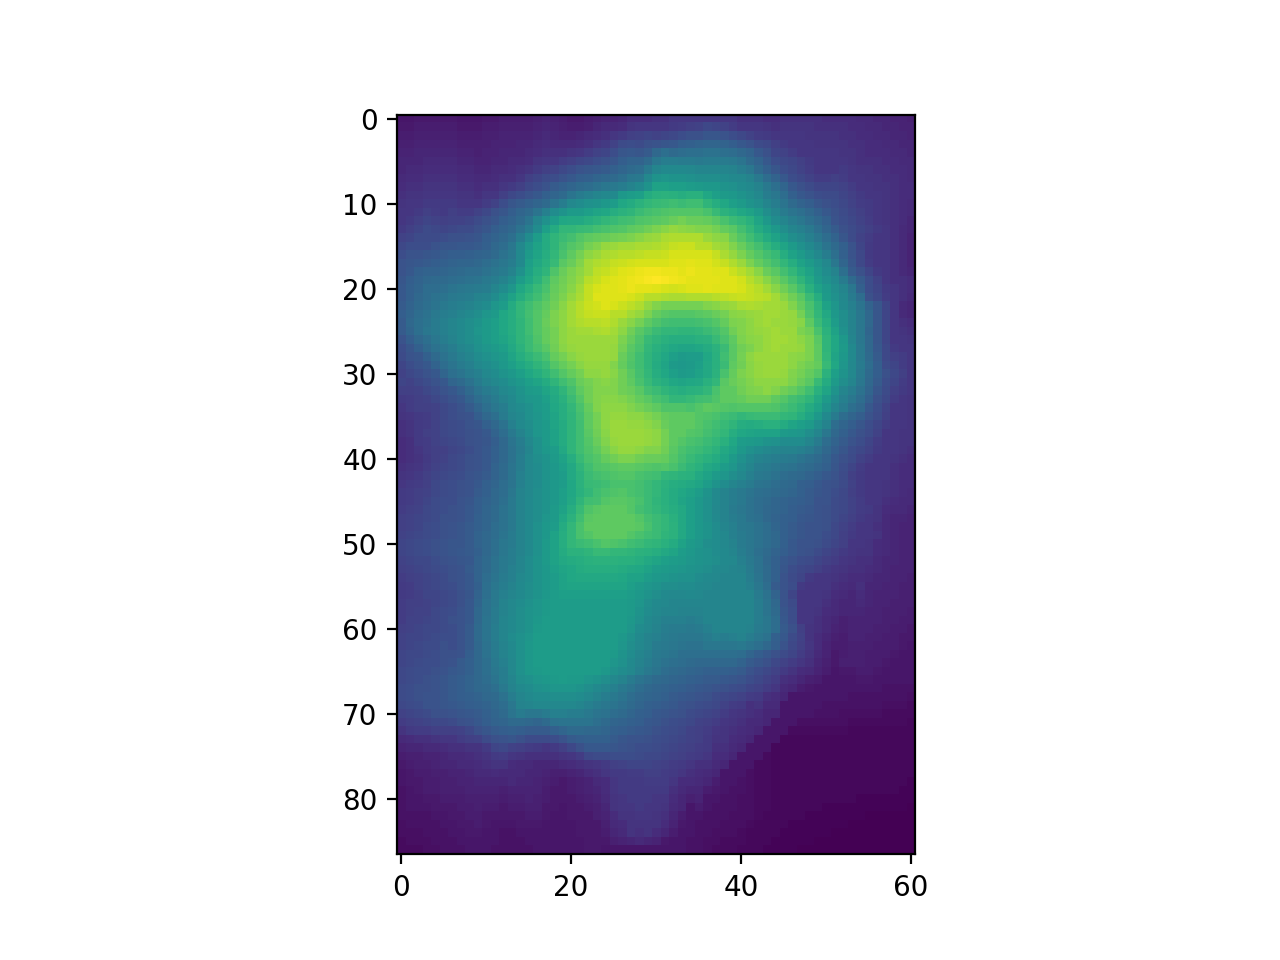

In [6]:
fig, ax = plt.subplots(1)
ax.imshow(data)
fig.show()

Using pandas, we can transform to column format with x, y, and z coordinate

In [7]:
df = data.unstack().reset_index()
df.columns=["X", "Y", "Z"]

In [8]:
df

,X,Y,Z
0,V1,0,100
1,V1,1,101
2,V1,2,102
3,V1,3,103
4,V1,4,104
...,...,...,...
5302,V61,82,94
5303,V61,83,94
5304,V61,84,94
5305,V61,85,94


The column names are still in string format so we transform them into a numeric value using map

In [9]:
df.X = df.X.map(lambda x: int(x[1:]))

In [10]:
df

,X,Y,Z
0,1,0,100
1,1,1,101
2,1,2,102
3,1,3,103
4,1,4,104
...,...,...,...
5302,61,82,94
5303,61,83,94
5304,61,84,94
5305,61,85,94


In [ ]:
%%time

fig, ax = plt.subplots(1, subplot_kw={'projection': '3d'})

# Plot the surface of the vulcano
ax.plot_trisurf(df['X'], df['Y'], df['Z'], 
                cmap=plt.cm.viridis, 
                linewidth=0.2)

def animate(angle):
    ax = plt.gca()
    
    # Rotate the figure by steps of 5 degrees
    ax.view_init(30, 5*angle)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

# Display the animation as an HTML video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

Save GIF file. The only way to do this is to regenerate the visualization from scratch by calling __anim.save()__ again

In [12]:
%%time

fig, ax = plt.subplots(1,subplot_kw={'projection': '3d'})
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

# Save the animation as a GIF
anim.save('data/volcano.gif')

CPU times: user 3min 7s, sys: 2min 45s, total: 5min 53s
Wall time: 24.8 s


which can easily open

In [13]:
!open -a /Applications/Firefox.app data/volcano.gif

Using FFMpegWriter we can generate other video formats

In [14]:
%%time

fig, ax = plt.subplots(1,subplot_kw={'projection': '3d'})
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

writervideo = FFMpegWriter(fps=60) 
anim.save("data/volcano.mp4", writer=writervideo)
# The file extensino selects the file format
#anim.save("data/volcano.mov", writer=writervideo)

CPU times: user 3min 50s, sys: 2min 2s, total: 5min 52s
Wall time: 23.2 s


In [15]:
!ls -l data/volcano.mp4

-rw-r--r--@ 1 bgoncalves  staff  925233 Oct 24 20:46 data/volcano.mp4


# Christmas Tree Animation

Here we will use a 3D scatter plot to "visualize" a simple Christmas tree

<IPython.core.display.Javascript object>


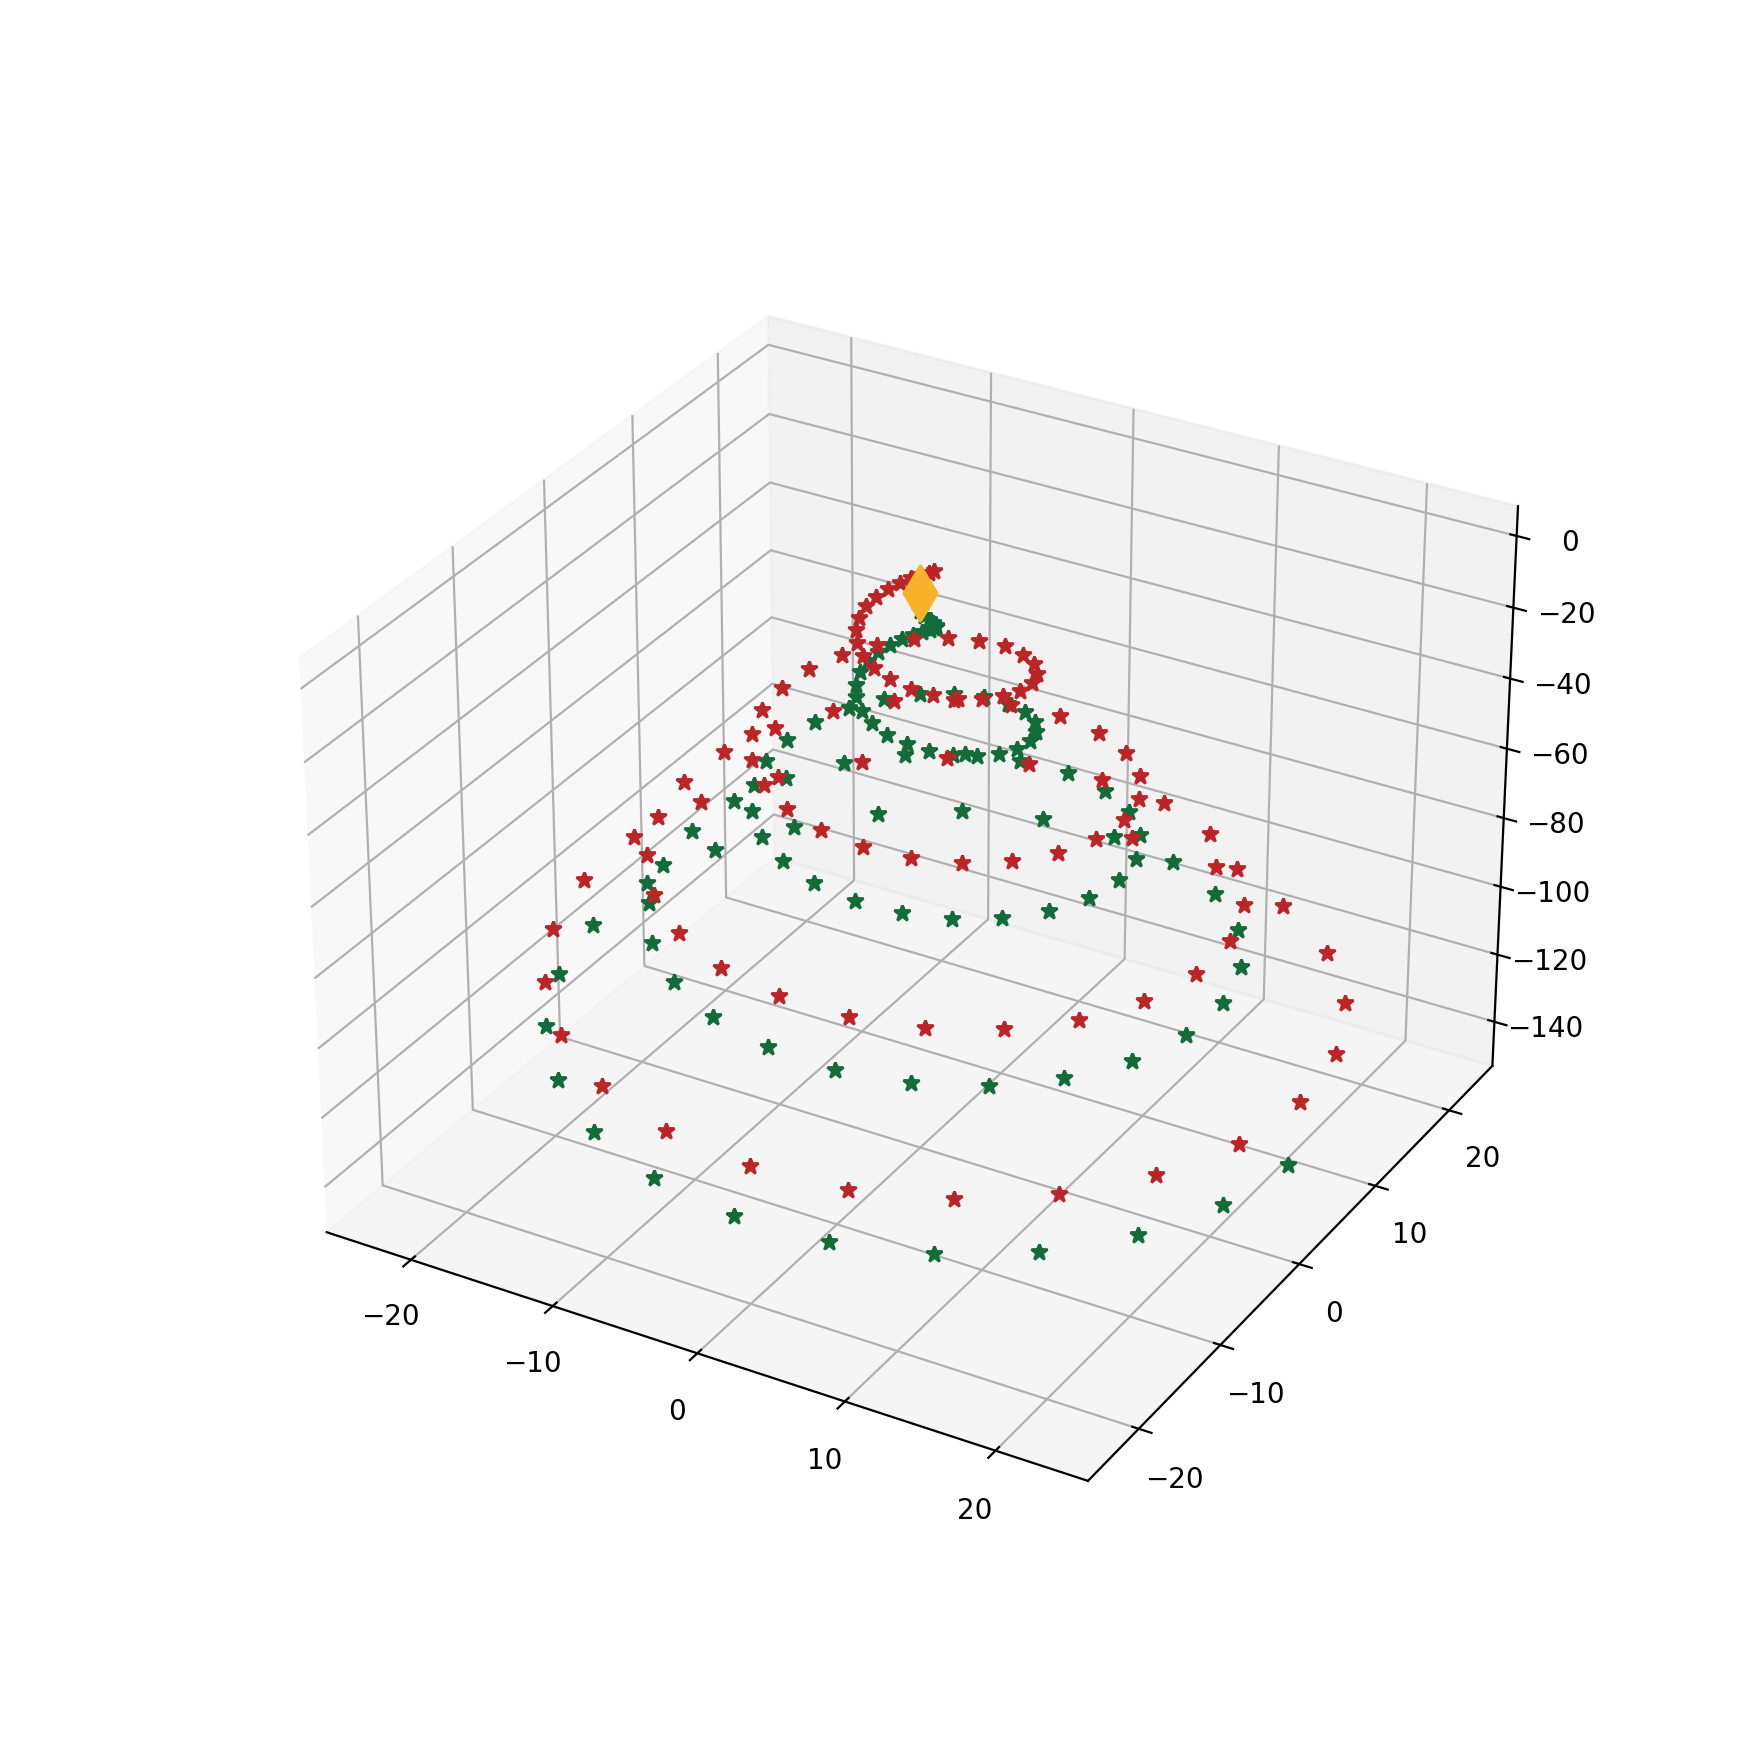

In [16]:
fig, ax =  plt.subplots(1, subplot_kw={'projection': '3d'}, figsize=(8.8, 8.8))

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

r = 4*np.pi+theta
z = -5*r
x = r * np.cos(theta)
y = r * np.sin(theta)

ax.plot(x, y, z, '*', color='#146B3A')

r2 = 4*np.pi+theta+np.pi/2
z2 = -5*r2+5*np.pi
x2 = r2 * np.cos(theta+np.pi/2)
y2 = r2 * np.sin(theta+np.pi/2)

ax.plot(x2, y2, z2, '*', color='#BB2528')

ax.scatter3D(0, 0, 5, color='#F8B229', s=200, marker="d")

ax.set_xlim(( -25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

fig.show()

Write the animate function that will produce the individual frames/

<IPython.core.display.Javascript object>


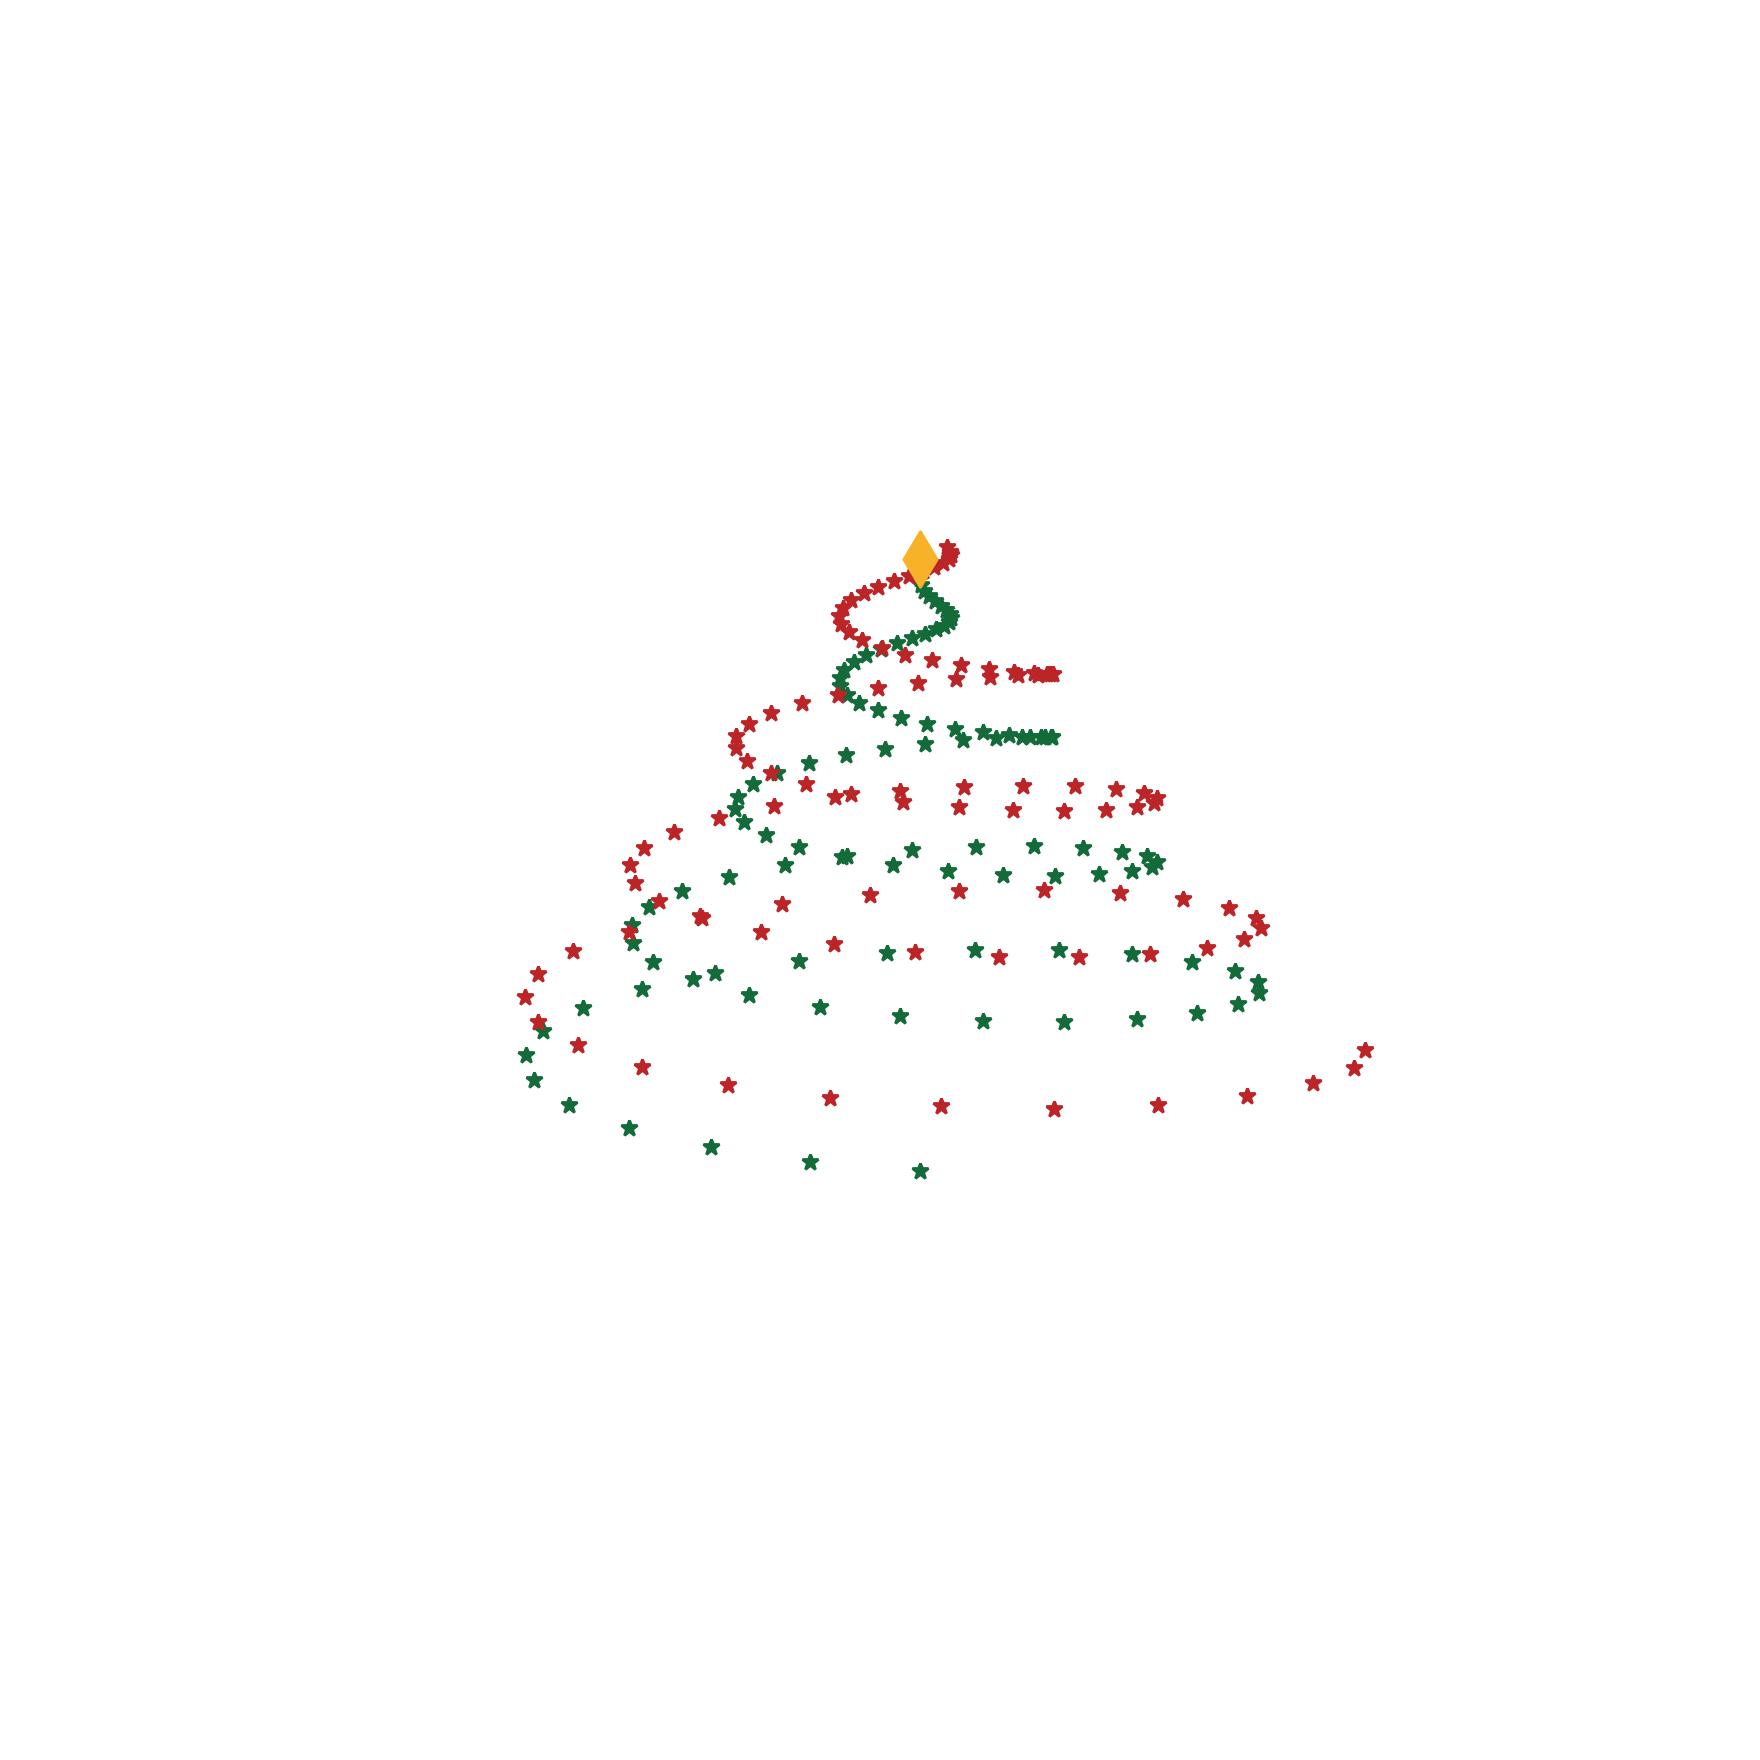

In [17]:
fig, ax =  plt.subplots(1, subplot_kw={'projection': '3d'}, figsize=(8.8, 8.8))

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.set_xlim(( -25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

line1, = ax.plot([], [], [], '*', color='#146B3A')
line2, = ax.plot([], [], [], '*', color='#BB2528')

ax.set_axis_off()
ax.view_init(10, 0)

def animate(i):
    speed = 50
    theta_t = theta-i/speed*np.pi
    
    r = 4*np.pi+theta
    z = -5*r
    x = r * np.cos(theta_t)
    y = r * np.sin(theta_t)

    r2 = 4*np.pi+theta+np.pi/2
    z2 = -5*r2+5*np.pi
    x2 = r2 * np.cos(theta_t+np.pi/2)
    y2 = r2 * np.sin(theta_t+np.pi/2)

    line1.set_data_3d(x, y, z)
    line2.set_data_3d(x2, y2, z2)
    ax.scatter3D(0, 0, 5, color='#F8B229', s=200, marker="d")

    return (line1, line2)

animate(0);
fig.show()

Finally, combine it all into the full animation

In [18]:
fig, ax =  plt.subplots(1, subplot_kw={'projection': '3d'}, figsize=(8.8, 8.8))

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.set_xlim(( -25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

line1, = ax.plot([], [], [], '*', color='#146B3A')
line2, = ax.plot([], [], [], '*', color='#BB2528')

ax.set_axis_off()
ax.view_init(10, 0)

def init():
    line1.set_data_3d([], [], [])
    line2.set_data_3d([], [], [])

    ax.scatter3D(0, 0, 5, color='#F8B229', s=200, marker="d")
    
    return (line1, line2)

bar = tqdm(total=4950)

def animate(i):
    bar.update(i)
    speed = 50
    
    theta_t = theta-i/speed*np.pi
    
    r = 4*np.pi+theta
    z = -5*r
    x = r * np.cos(theta_t)
    y = r * np.sin(theta_t)

    r2 = 4*np.pi+theta+np.pi/2
    z2 = -5*r2+5*np.pi
    x2 = r * np.cos(theta_t+np.pi/2)
    y2 = r * np.sin(theta_t+np.pi/2)

    line1.set_data_3d(x, y, z)
    line2.set_data_3d(x2, y2, z2)

    return (line1, line2)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

  0%|          | 0/4950 [00:00<?, ?it/s]

# Rotating Heatmap

In this example, we will see how to build a more sophisticated animation that combines Cartopy and matplotlib. Our dataset is a global grid of temperature anomalies from NASA

In [19]:
data = pd.read_fwf('data/amaps.txt',
                  skiprows=1, header=0, sep="\t", widths=[4, 5, 8, 8, 16])

We essentially have one value for each lat/lon grid cell

In [20]:
data.describe()

,i,j,lon,lat,"array(i,j)"
count,16200.000000,16200.00000,16200.000000,16200.00000,16200.000000
mean,90.500000,45.50000,0.000000,0.00000,0.434452
std,51.962326,25.97996,103.924652,51.95992,1.421305
min,1.000000,1.00000,-179.000000,-89.00000,-7.632800
25%,45.750000,23.00000,-89.500000,-45.00000,-0.354000
50%,90.500000,45.50000,0.000000,0.00000,0.154500
75%,135.250000,68.00000,89.500000,45.00000,0.916300
max,180.000000,90.00000,179.000000,89.00000,7.894100


We reshape the data into a matrix form

In [21]:
img = data[data.columns[-1]].values.reshape(90, 180)[::-1,:]

Generate a quick visualization

<IPython.core.display.Javascript object>


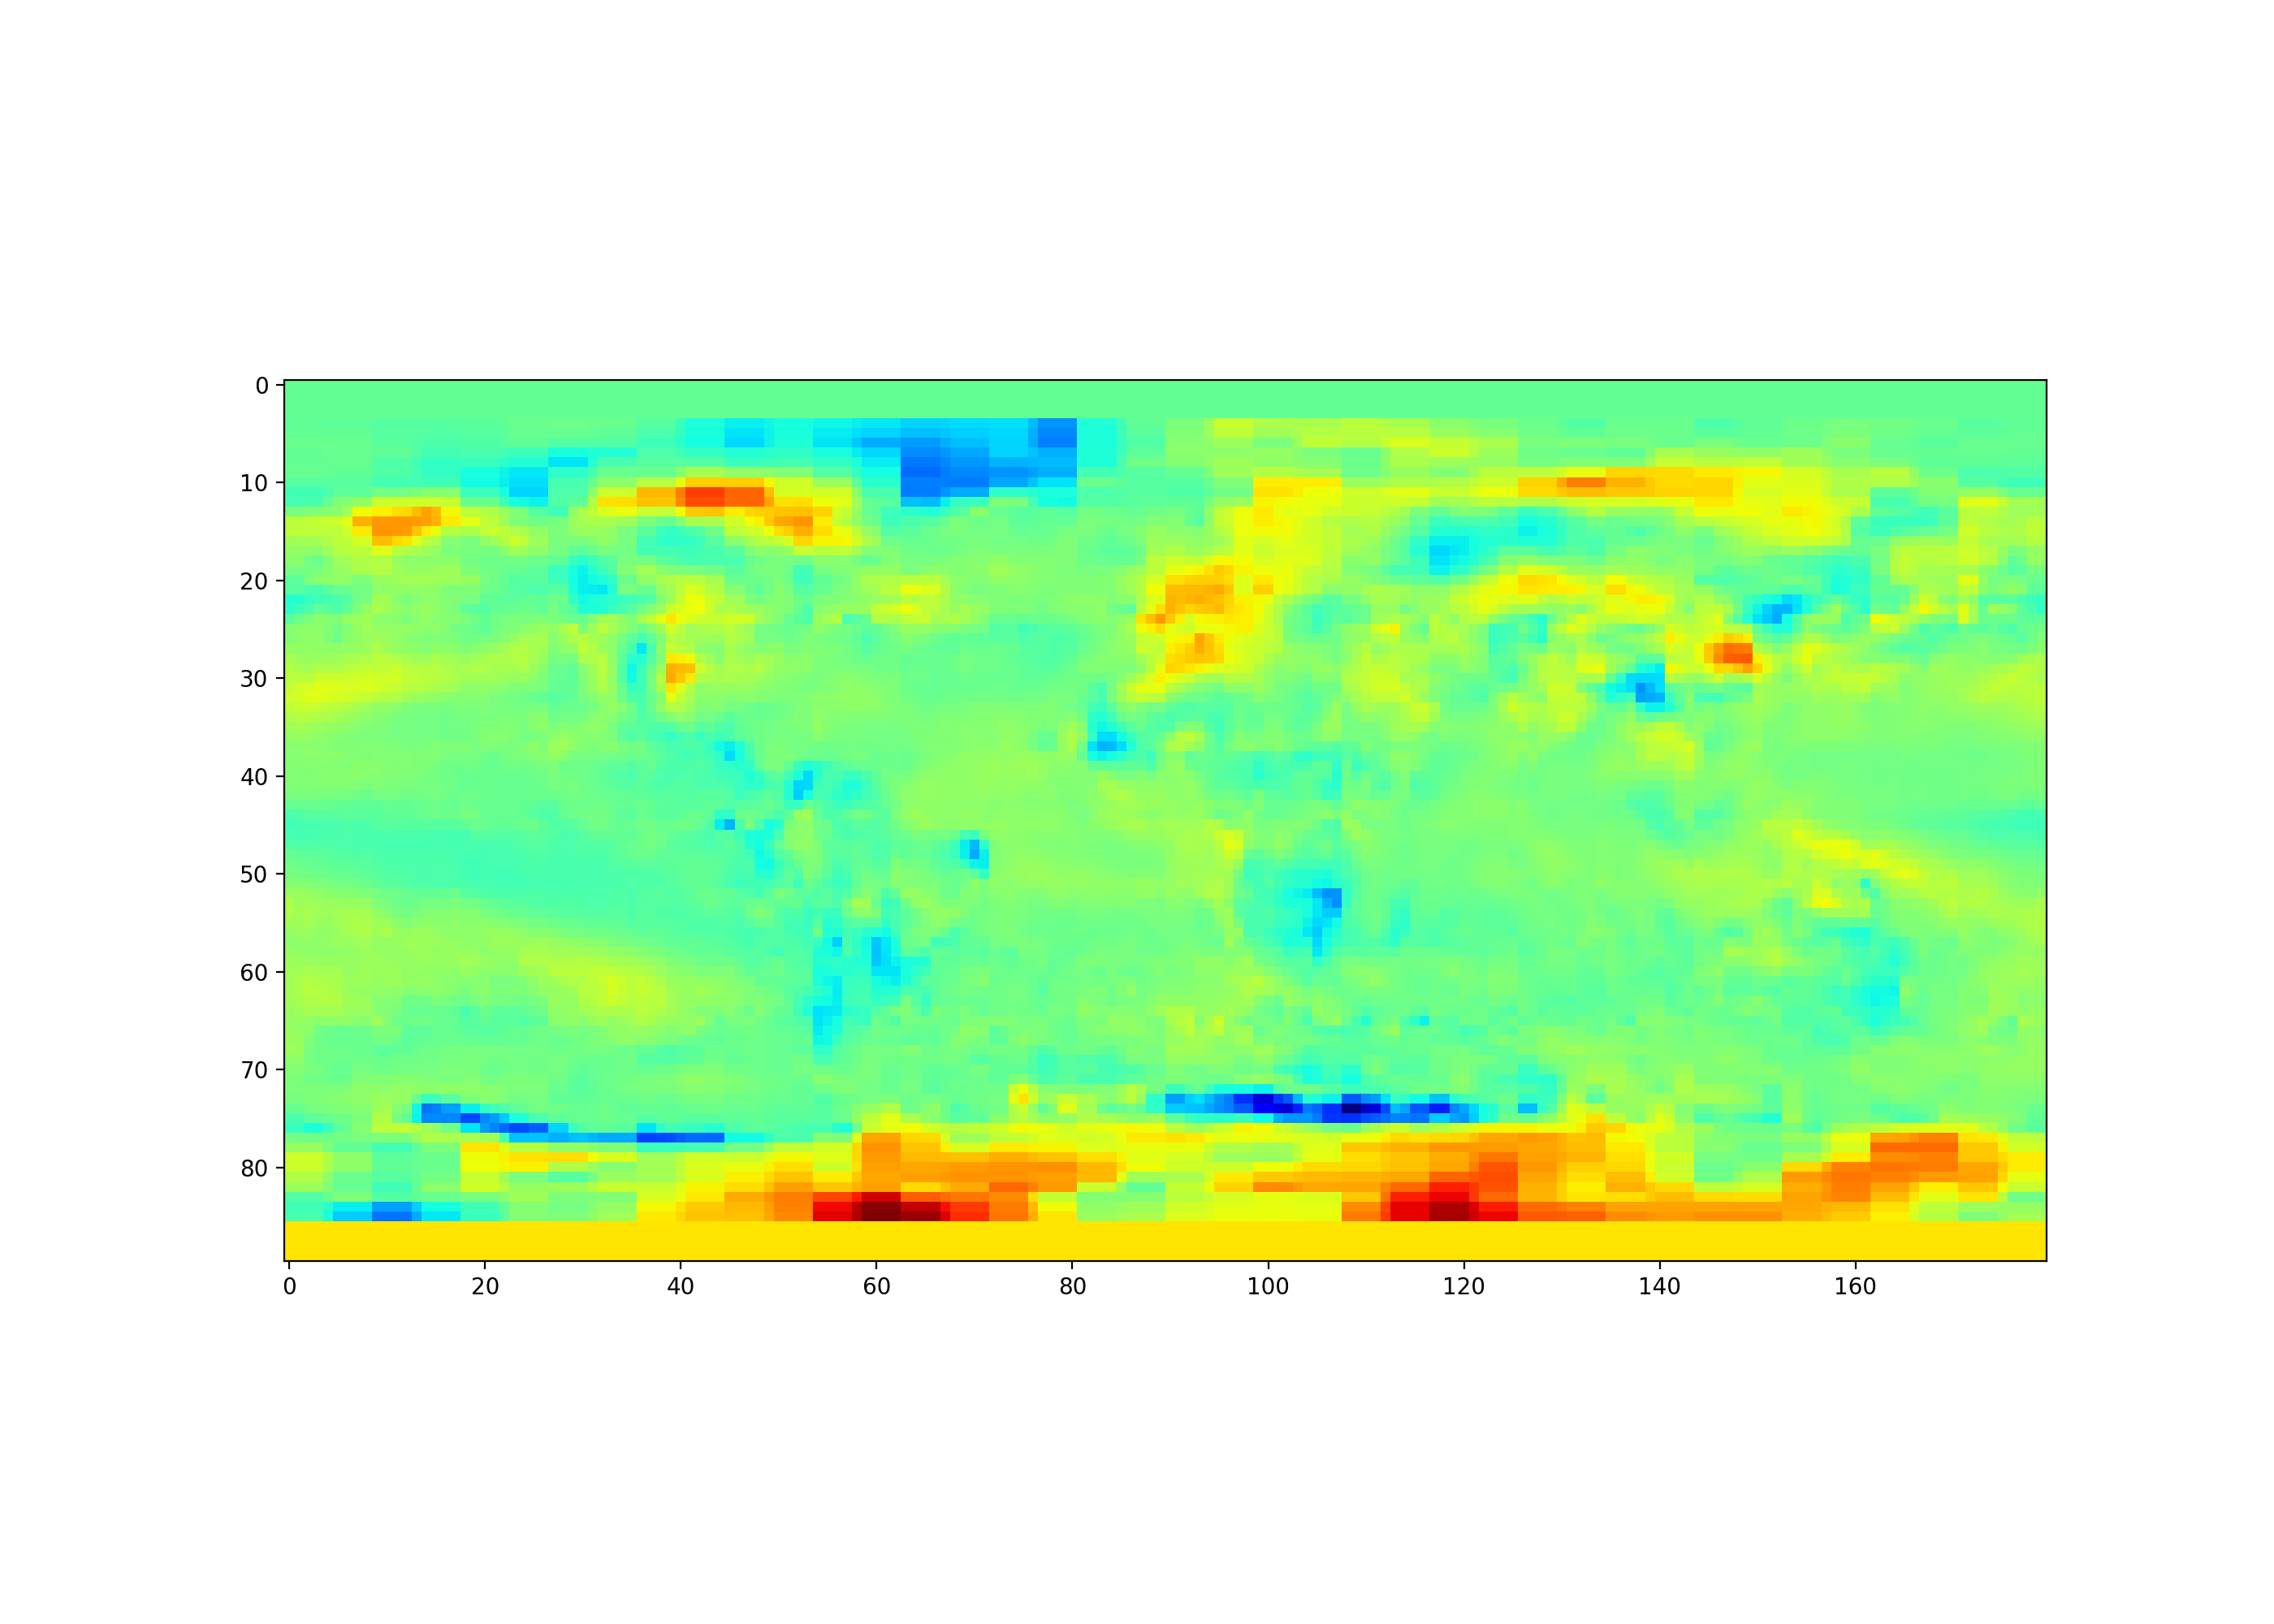

In [22]:
fig, ax = plt.subplots(1, figsize=(14, 10))

ax.imshow(img, cmap=plt.cm.jet) 
fig.show()

# Cartopy visualization

We can improve significantly on this raw version with the aid of Cartopy

<IPython.core.display.Javascript object>


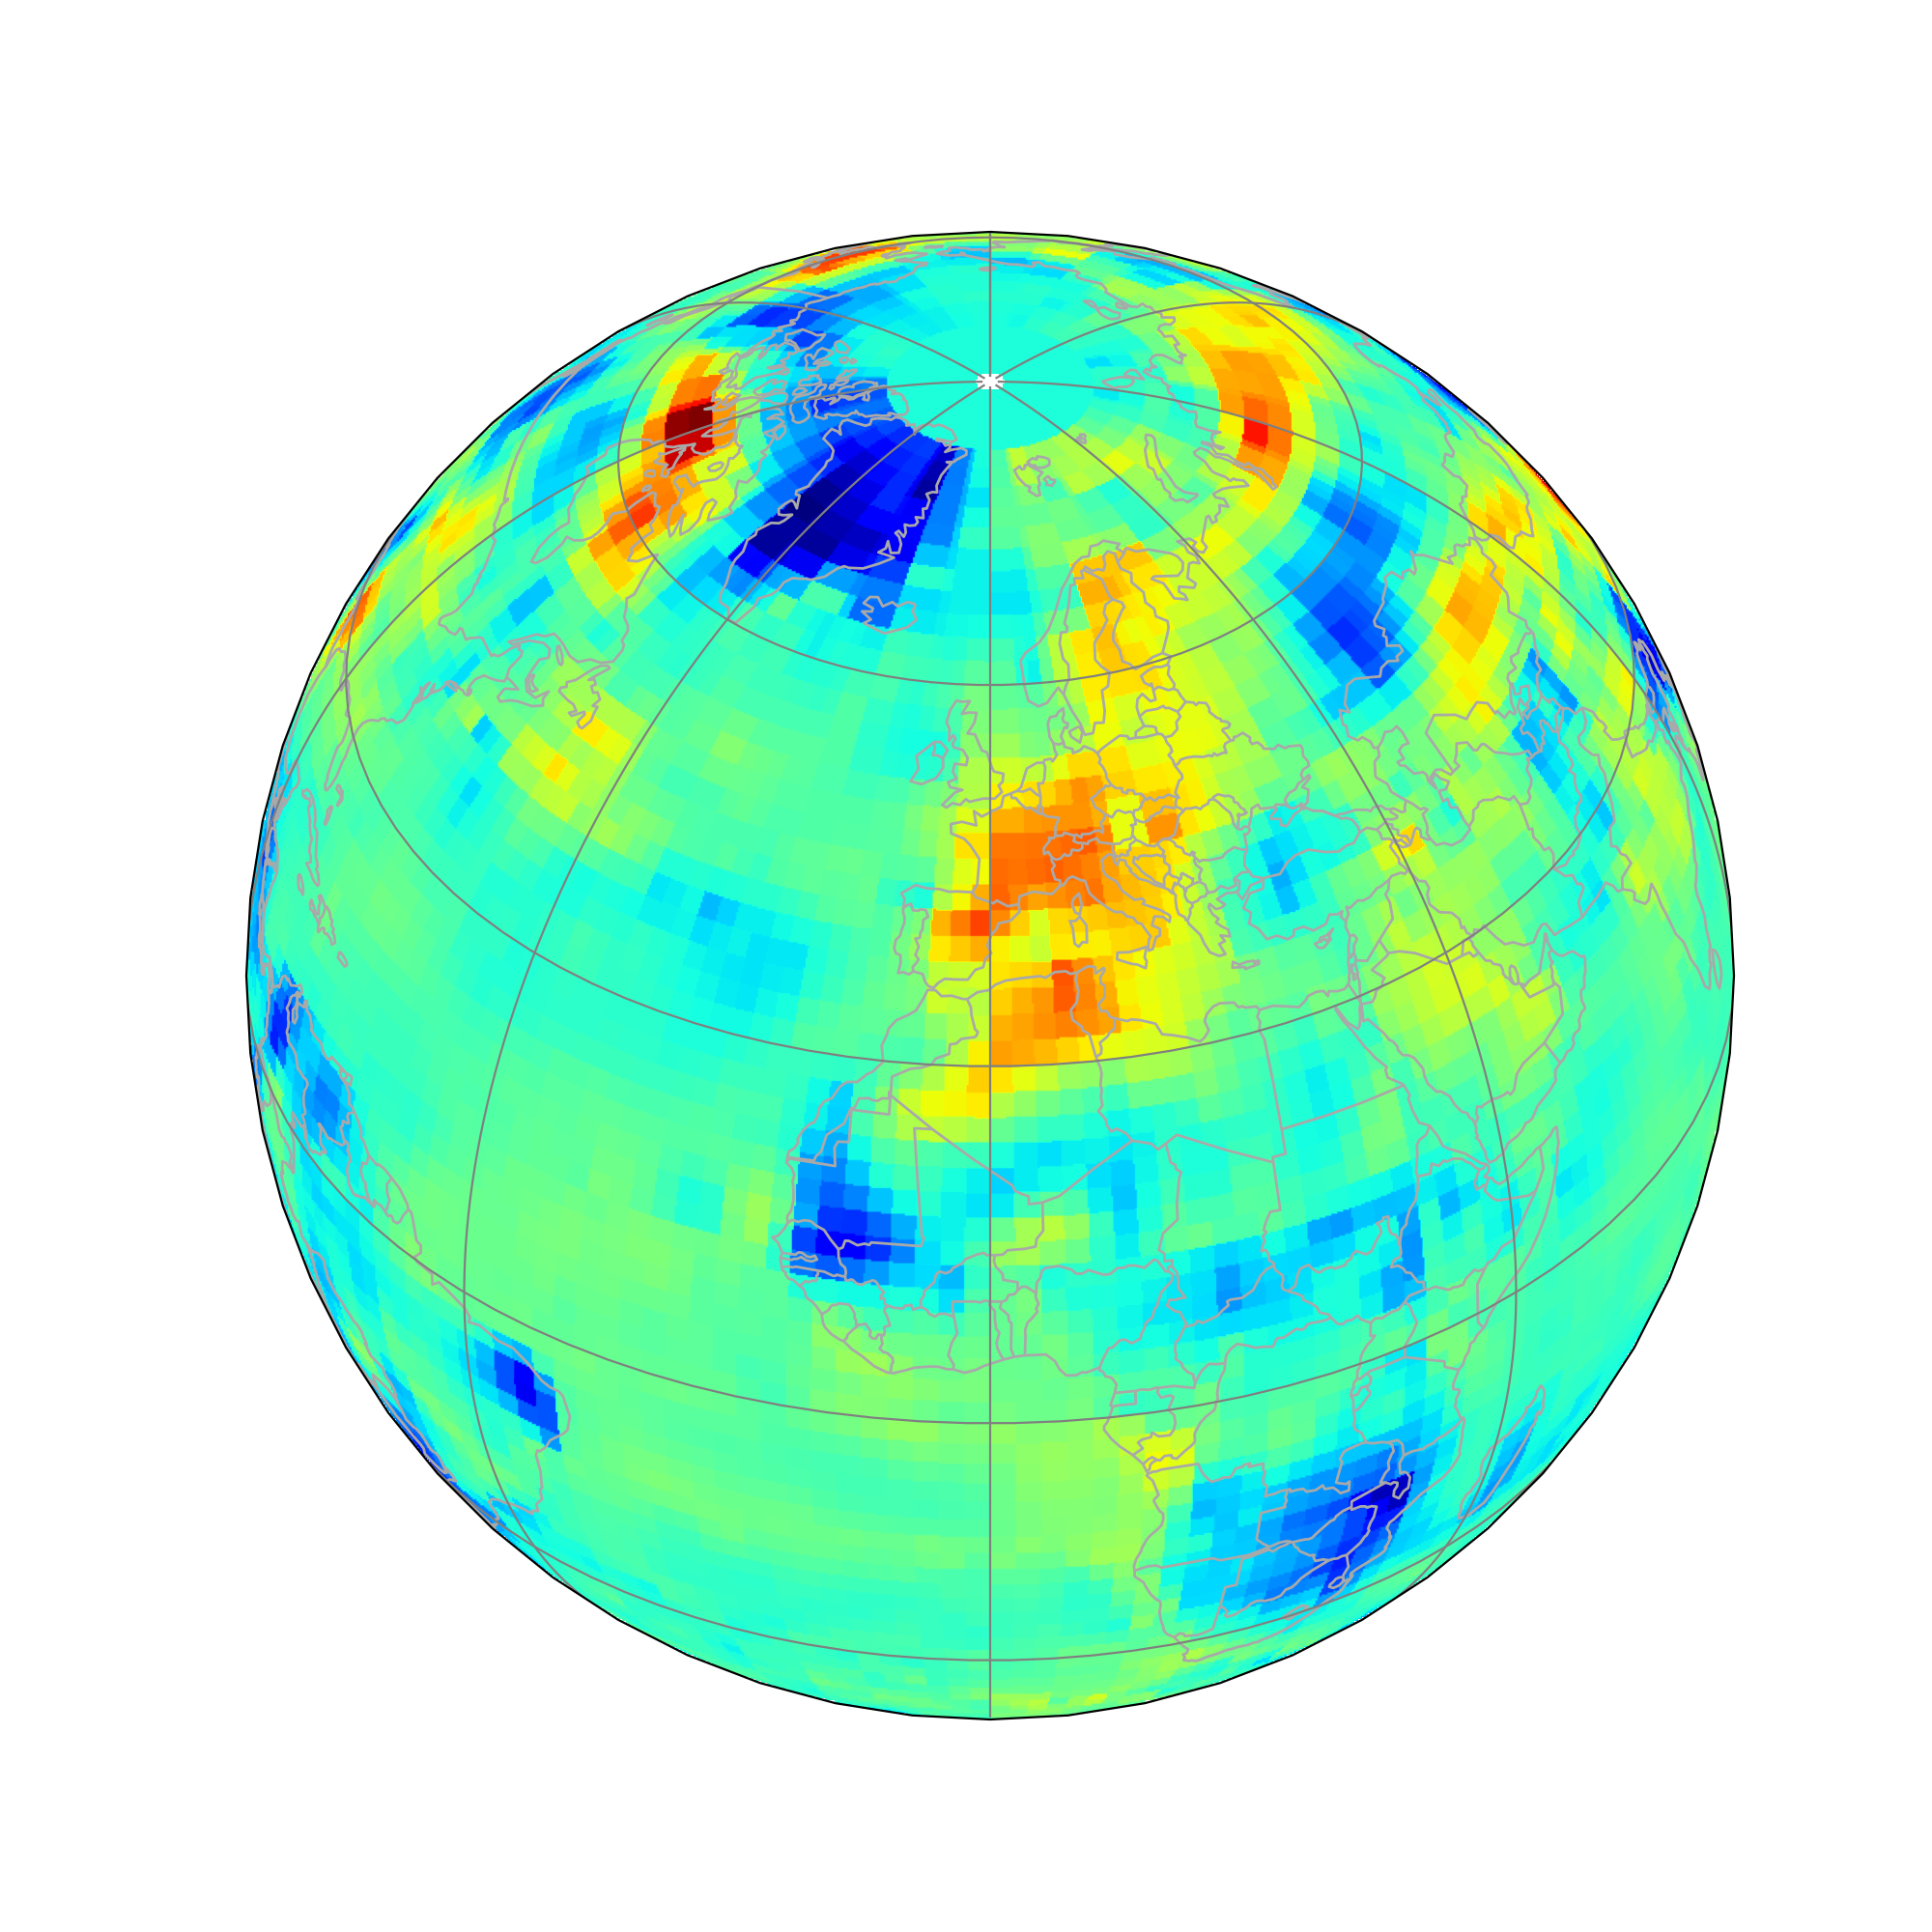

In [23]:
ax = plt.axes(projection=ccrs.Orthographic(0, 37))
fig = plt.gcf()

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='darkgray', lw=1)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=False, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')

# Longitude corresponds to the x-axis and Latitude to the y-axis.
ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
          # Tell cartopy what the original projection of the data is
          transform=ccrs.PlateCarree(), 
          cmap=plt.cm.jet, zorder=-1) 

fig.set_size_inches(10, 10)
fig.show()

Finally, we animate it by rotating the globe by a few degrees for each frame

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(0, 37)}, 
                       figsize=(16, 16))

bar = tqdm(total=73)
frame = 0

# Make the background black
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

# Define the function that will generate each frame
def animate(count):
    global frame
    frame += 1
    bar.update(1)
    ax = plt.axes(projection=ccrs.Orthographic(count, 37))

    # Add the heatmap as a "texture" on top of the globe
    ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
              # Tell cartopy what the original projection of the data is
              transform=ccrs.PlateCarree(), 
              cmap=plt.cm.jet)  

    # Add longitude and latitude grid lines
    ax.gridlines(draw_labels=False, dms=True, 
                 xlocs=np.arange(-180, 180.1, 45), 
                 ylocs=np.arange(-90, 90.1, 30),
                 x_inline=False, y_inline=False, color='gray')

    # Draw country borders
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray', lw=1, alpha=1)
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='gray', lw=1, alpha=1)

    return 

# Create the animation object
anim = FuncAnimation(fig, animate,
                               frames=np.arange(0, 360, 5), 
                               interval=1, blit=False, repeat=False)

anim.save('data/globe.gif')

  0%|          | 0/73 [00:00<?, ?it/s]

In [25]:
!open -a /Applications/Firefox.app data/globe.gif

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>